Res [[3.00000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.68381665e+02]
 [2.99989680e+02 9.91683753e-01 1.03202547e-02 1.03195455e-02
  1.68582066e+02]
 [2.99959036e+02 1.96304412e+00 4.09638949e-02 4.09582686e-02
  1.68782466e+02]
 ...
 [6.17874156e+01 2.59783408e+02 2.38212584e+02 2.31423618e+02
  2.67448339e+02]
 [6.15942109e+01 2.60592207e+02 2.38405789e+02 2.31598727e+02
  2.67647320e+02]
 [6.14019566e+01 2.61401957e+02 2.38598043e+02 2.31772894e+02
  2.67846303e+02]]


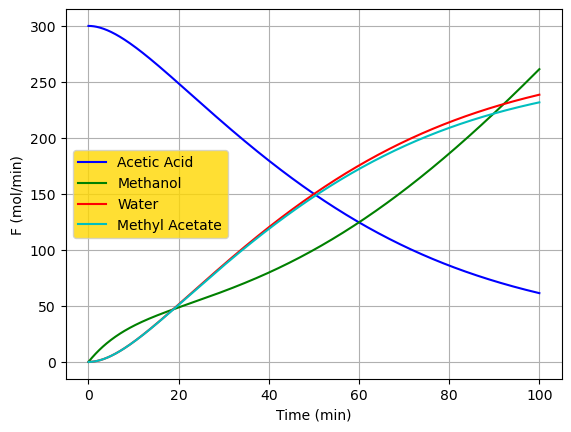

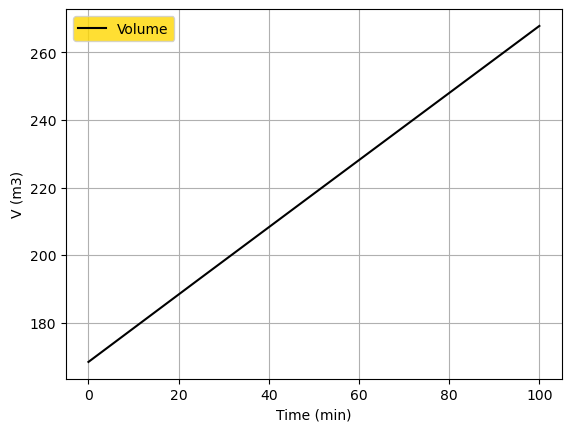

In [1]:
#Packages import
import numpy as np
from scipy import optimize
from scipy import integrate
import matplotlib.pyplot as plt

#Initial conditions and parameter definition
N_AA_0=300 #intial number of kmol of AA
MW_AA=60 #AA molecular weight
rho_AA=106.9 #AA density (g/cm3)
MW_AAMe=74 #AAMe molecular weight
rho_AAMe=943.4 #AA_Me density (g/cm3)
T=300 #Temperature
T_r=T/506.5 #Reduced temperature
P_tot=101 #Pressure (kPa)
V_0=N_AA_0*MW_AA/rho_AA #Initial volumen wtihin the reactor

#Reaction parameters
k=(8.8E8)*np.exp(-7032.1/T)
K_eq=5.2*np.exp(-(8000/1.978)*(1/298-1/T))
P_vap=4750*np.exp(10.703-(11.0088/T_r)-5.431*np.
log(T_r)+0.3058*T_r**6)

#The empty list N is created to save the number of moles variation of each
#component in the first four places and the volume variation in the last position
N=[(),(),(),(),()]

#The empty list Conc is created to save theconcetration variation
Conc=[(),(),(),()]

#A function is defined to collect the equations to be solved
def kinetics (N,t):
# Concentration calculation of each comonent
    Conc[0]=N[0]/N[4]
    Conc[1]=N[1]/N[4]
    Conc[2]=N[2]/N[4]
    Conc[3]=N[3]/N[4]
    
#Acetic acid reaction rate
    r_AA=k*(Conc[1]*Conc[0]-Conc[3]*Conc[2]/K_eq)
    
#Additional equations
    x_AAMe=N[3]/(N[0]+N[1]+N[2]+N[3]) #Molar fraction of methyl acetate
    F_AAMe=x_AAMe*P_vap/P_tot #Methyl acetate removed flow
    v_0=1 # inlet volumetric flow
    C_MetOH_0=5 #inital MetOH concentration
    F_MetOH_0=v_0*C_MetOH_0 #inlet MetOH molar flow
    alpha=MW_AAMe/rho_AAMe #alpha parameter
    
#An empty array is created to save define the equations
    dNdt=np.zeros(5)
    dNdt[0] = -r_AA*N[4]
    dNdt[1] = -r_AA*N[4]+F_MetOH_0
    dNdt[2] = r_AA*N[4]
    dNdt[3] = r_AA*N[4]-F_AAMe
    dNdt[4] = v_0-F_AAMe*alpha
    return dNdt

#Creation of the time array over the equations will be evaluated
t=np.linspace(0,100,500)

#Initial conditions
N_ini=[N_AA_0, 0, 0, 0, V_0]

#ODE system solver
Res=integrate.odeint(kinetics,N_ini,t)

#Print the results
print ('Res',Res)
#Create plots:
#Number of moles variation
fig,axes=plt.subplots()
axes.plot(t,Res[:,0],'b', label='Acetic Acid')
axes.plot(t,Res[:,1],'g', label='Methanol')
axes.plot(t,Res[:,2],'r', label='Water')
axes.plot(t,Res[:,3],'c', label='Methyl Acetate')
axes.set_xlabel('Time (min)')
axes.set_ylabel('F (mol/min)')
axes.grid('on') #Insert grid
legend = axes.legend(loc='best', fontsize='medium') #Legend location and font size
legend.get_frame().set_facecolor('#FFD700') #Nicer background color on the legend.

#Volumen variation
fig,axes=plt.subplots()
axes.plot(t,Res[:,4],'k', label='Volume')
axes.set_xlabel('Time (min)')
axes.set_ylabel('V (m3)')
axes.grid('on')
legend = axes.legend(loc='best', fontsize='medium')
legend.get_frame().set_facecolor('#FFD700')